<a href="https://colab.research.google.com/github/hyunjin-h/DigitalCommunication/blob/main/imgae_BPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os
import sys
import math
import matplotlib.pyplot as plt

(480, 640, 3)


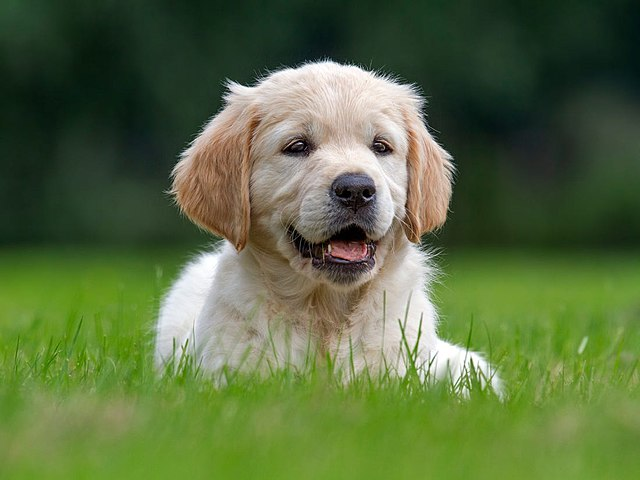

In [ ]:
filepath='/content/drive/MyDrive/Colab Notebooks/2023/Dog.jpg'
img=cv2.imread(filepath)
print(img.shape)
cv2_imshow(img)

(480, 640)
실제 파일 크기:  524920 bit
압축전 이미지 크기:  2457600 bit
Compression Ratio:  37.455
Data Rate Saving:  0.973


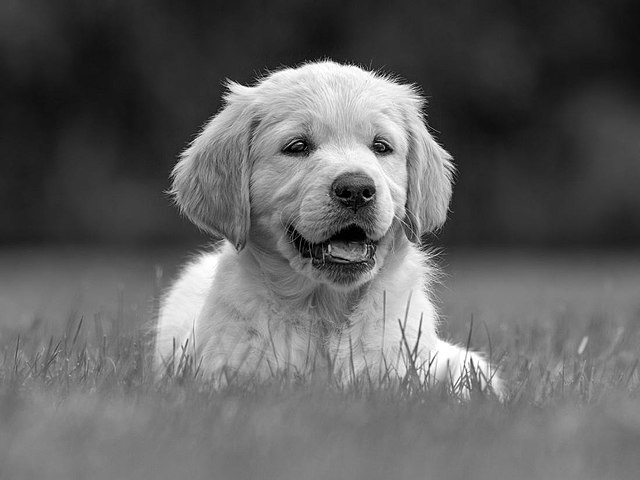

In [ ]:
img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE) # 8bit grayscale
print(img.shape) # 1 channel
cv2.imwrite('dog_gray.jpg',img)

file_size = os.path.getsize(r'dog_gray.jpg') 
print('실제 파일 크기: ', file_size*8, 'bit') # 1byte=8bit
original=8*480*640 # bit
print('압축전 이미지 크기: ', original,'bit')
print('Compression Ratio: ',round(original/file_size,3))
print('Data Rate Saving: ', round(1-file_size/original,3))
cv2_imshow(img)

In [ ]:
print(img)

[[ 64  64  64 ...  18  18  18]
 [ 64  64  64 ...  18  18  17]
 [ 64  64  64 ...  18  17  17]
 ...
 [117 118 119 ... 120 119 119]
 [118 119 119 ... 121 120 119]
 [119 119 119 ... 121 120 119]]


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(len(img),'*',len(img[0]),' array') # 배열의 행, 열 개수
print(img[0])

480 * 640  array
[64 64 64 64 64 64 64 64 64 66 66 65 65 66 66 64 63 62 61 59 58 57 56 56
 57 56 55 55 55 54 53 51 51 51 52 52 52 51 51 50 50 50 49 48 47 46 45 45
 43 43 42 42 41 41 41 42 42 41 40 40 41 41 40 39 38 39 39 38 37 36 36 38
 37 37 36 37 38 39 39 38 40 39 38 39 40 41 40 39 41 40 39 38 38 37 37 37
 35 37 39 40 39 38 38 38 40 40 41 43 44 44 45 45 44 43 42 41 39 39 38 38
 40 40 40 40 40 40 40 40 41 42 43 43 44 44 44 44 44 44 44 44 43 43 42 42
 41 41 40 39 39 38 38 37 39 38 38 37 37 36 36 36 34 34 33 33 32 32 31 31
 31 30 29 29 30 30 30 30 29 28 27 28 28 28 28 27 28 26 25 25 25 25 25 24
 24 24 24 24 24 24 24 24 26 26 26 26 27 27 27 27 26 26 26 26 26 26 26 26
 29 29 29 29 29 28 28 28 27 27 27 27 28 28 28 28 28 28 28 28 28 28 28 28
 30 30 31 31 32 32 33 33 33 33 34 35 36 35 35 35 37 35 34 35 35 35 33 31
 31 32 33 34 35 35 36 36 36 36 36 37 37 38 38 38 40 40 40 39 39 38 37 36
 37 37 37 37 38 38 38 38 38 37 37 37 36 36 36 36 36 35 35 34 33 33 33 33
 35 32 28 28 30 31 32 31 33 32 31 

In [ ]:
def img2bit(img):
    # img: int array -> 8bit array 변환
    imglist=img.tolist()
    for i in range(len(imglist)):
        for j in range(len(imglist[i])):
            imglist[i][j]=format(imglist[i][j],'08b') # 8bit로 표시

    # 1차원 배열로 변환
    signal=[]
    imglist=np.ravel(imglist, order='C')

    for i in imglist:
        signal.append(list(i))
    signal=np.ravel(signal, order='C').tolist()
    return signal

In [ ]:
#bpsk 변환 (0->-1, type=float)
def bpsk(array):
    for i in range(len(array)):
        array[i]=array[i].replace('0','-1')
        array[i]=float(array[i])
    return array

# x is signal
# mean is the mean
# std is the standard deviation  
def gaussian_noise(signal,mean,std):
    noise = np.random.normal(mean, std, size = len(signal))
    signal_noisy = signal + noise
    return signal_noisy 

def decision_bit(array):
    for i in range(len(array)):
        if(array[i]<0):
            array[i]=0 
        else:
            array[i]=1
    # numpy.float64
    array = [int(item) for item in array]
    array = [str(item) for item in array]    

    return array

In [ ]:
def error_counter(inarray, outarray):
    cnt=0
    for i in range(len(inarray)):
        if inarray[i]!=outarray[i]:
            cnt=cnt+1
    return cnt

In [ ]:
def bit2img(bit):
    imglist=[]
    for i in range(int(len(bit)/8)):
        item=''.join(bit[i*8:i*8+8])
        imglist.append(item)
    imglist = [int(item,2) for item in imglist]
    result=np.array(imglist).reshape(480,640)
    return result

In [ ]:
#1.jpg to bit 2.bpsk 3.noise 4.decision 5.bit to jpg 6.BER plot
def main(x,N):
    signal=img2bit(x) # 1

    signal_bpsk=signal[:] # copy
    signal_bpsk=bpsk(signal_bpsk) # 2


    signal_noisy=gaussian_noise(signal_bpsk, 0, math.sqrt(N)) # 3
    received_signal=decision_bit(signal_noisy)

    img=bit2img(received_signal)
    # cv2_imshow(img)

    cnt=error_counter(signal, received_signal)
    print(N,' done')
    return cnt/(8*480*640)

In [ ]:
#1.jpg to bit 2.bpsk 3.noise 4.decision 5.bit to jpg 6.BER plot
def main_print(x,N):
    signal=img2bit(x) # 1
    print('1.jpg to bit\n',signal[0:10])
    signal_bpsk=signal[:] # copy
    signal_bpsk=bpsk(signal_bpsk) # 2
    print('2.bpsk\n',signal_bpsk[0:10])

    signal_noisy=gaussian_noise(signal_bpsk, 0, math.sqrt(N)) # 3
    print('3.add gaussian noise\n',signal_noisy[0:10])

    received_signal=decision_bit(signal_noisy)
    print('4.decision bit\n',received_signal[0:10],'\n')

    img=bit2img(received_signal)
    print('noise power: ',N)
    cv2_imshow(img)

    cnt=error_counter(signal, received_signal)
    print(cnt/(8*480*640))
    print("\n\n")
    return 0

In [ ]:
xlist=[i for i in range(0,22)]
ylist=[]
#dB값을 분산값으로 변환
for db in range(0,22):
    print(db)
    var=math.pow(10.0,-db/10.0) #pow는 거듭제곱 함수
    ylist.append(main(img,var))

1.0  done
0.7943282347242815  done
0.6309573444801932  done
0.5011872336272722  done
0.3981071705534972  done
0.31622776601683794  done
0.251188643150958  done
0.19952623149688797  done
0.15848931924611134  done
0.12589254117941673  done
0.1  done
0.07943282347242814  done
0.06309573444801933  done
0.05011872336272722  done
0.039810717055349734  done
0.03162277660168379  done
0.025118864315095794  done
0.0199526231496888  done
0.015848931924611134  done
0.012589254117941675  done
0.01  done
0.007943282347242814  done


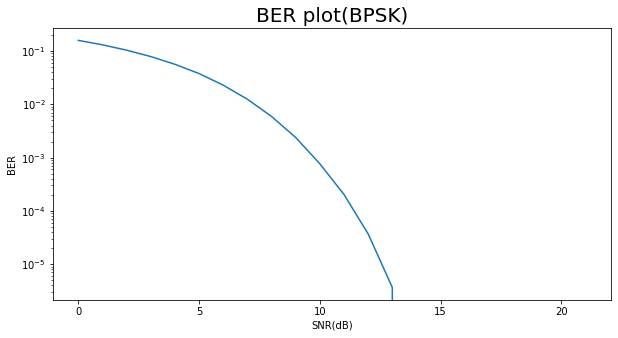

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(xlist,ylist)

plt.title('BER plot(BPSK)',fontsize=20)
plt.xlabel('SNR(dB)')
plt.ylabel('BER')
plt.yscale('log')
plt.savefig('BERplot.png')
plt.show()

1.jpg to bit
 ['0', '1', '0', '0', '0', '0', '0', '0', '0', '1']
2.bpsk
 [-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0]
3.add gaussian noise
 [-1.22491757  0.3674703  -0.61257331 -1.14017124 -0.80386371 -0.96985151
 -0.8698232  -0.93983245 -0.97325629  0.5619159 ]
4.decision bit
 ['0', '1', '0', '0', '0', '0', '0', '0', '0', '1'] 

noise power:  0.1


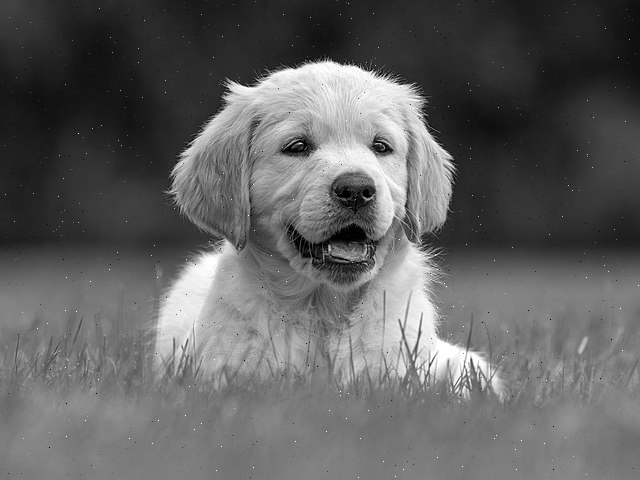

0.00081298828125



1.jpg to bit
 ['0', '1', '0', '0', '0', '0', '0', '0', '0', '1']
2.bpsk
 [-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0]
3.add gaussian noise
 [-0.15944928  1.02059148 -0.92134036 -0.08250812 -0.46529901 -0.18595458
  0.23848845 -1.09923473 -1.56617544  3.11348461]
4.decision bit
 ['0', '1', '0', '0', '0', '0', '1', '0', '0', '1'] 

noise power:  1


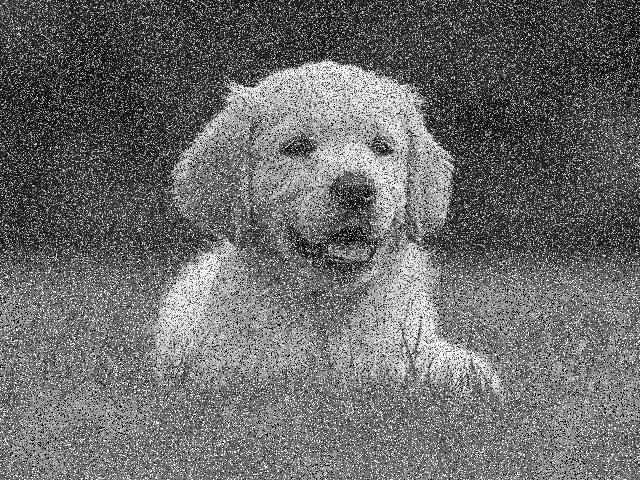

0.15885904947916665





In [ ]:
n1=main_print(img,0.1)
n2=main_print(img,1)